In [1]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid

%matplotlib inline

# Read raw DEM
grid = Grid.from_raster('/home/lazin1/ISIMIP_WaterGap/Flood_Inundation/missisippi_06112019.tif')
dem = grid.read_raster('/home/lazin1/ISIMIP_WaterGap/Flood_Inundation/missisippi_06112019.tif')
# Detect pits
pits = grid.detect_pits(dem)

# Fill pits
pit_filled_dem = grid.fill_pits(dem)
pits = grid.detect_pits(pit_filled_dem)
assert not pits.any()

# Detect depressions
depressions = grid.detect_depressions(pit_filled_dem)

# Fill depressions
flooded_dem = grid.fill_depressions(pit_filled_dem)
depressions = grid.detect_depressions(flooded_dem)
assert not depressions.any()

# Detect flats
flats = grid.detect_flats(flooded_dem)

inflated_dem = grid.resolve_flats(flooded_dem)
flats = grid.detect_flats(inflated_dem)
assert not flats.any()


# Compute flow direction based on corrected DEM
fdir = grid.flowdir(inflated_dem)

# Compute flow accumulation based on computed flow direction
acc = grid.accumulation(fdir)

# Threshold to extract stream network
threshold = 500  # Adjust based on your data
streams = acc > threshold
output_path = 'stream_network.tif'
grid.to_raster(streams, output_path,nodata=0)

ModuleNotFoundError: No module named 'pysheds'

In [2]:
# Detect pits
pits = grid.detect_pits(dem)

In [3]:
# Fill pits
pit_filled_dem = grid.fill_pits(dem)
pits = grid.detect_pits(pit_filled_dem)
assert not pits.any()

In [4]:
# Detect depressions
depressions = grid.detect_depressions(pit_filled_dem)

In [5]:
# Fill depressions
flooded_dem = grid.fill_depressions(pit_filled_dem)
depressions = grid.detect_depressions(flooded_dem)
assert not depressions.any()

In [6]:
# Detect flats
flats = grid.detect_flats(flooded_dem)

In [7]:
inflated_dem = grid.resolve_flats(flooded_dem)
flats = grid.detect_flats(inflated_dem)
assert not flats.any()

In [8]:
# Compute flow direction based on corrected DEM
fdir = grid.flowdir(inflated_dem)

# Compute flow accumulation based on computed flow direction
acc = grid.accumulation(fdir)

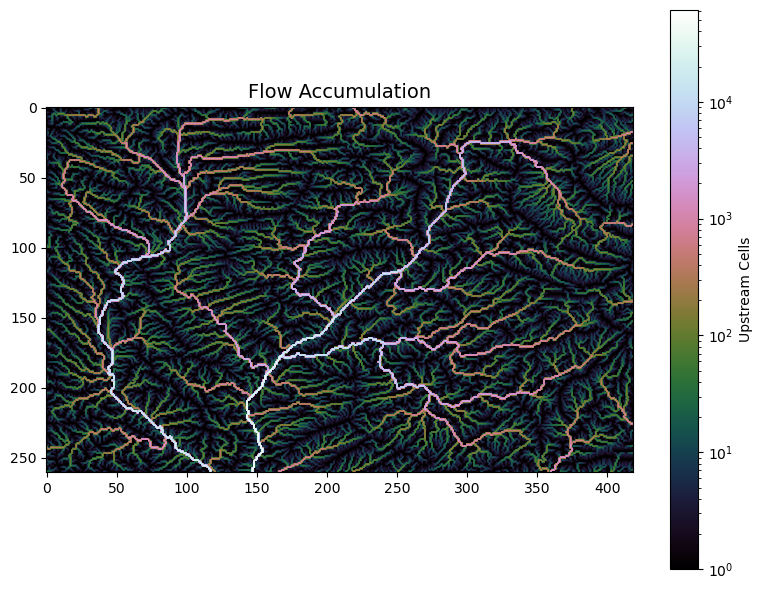

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
fig.patch.set_alpha(0)
im = ax.imshow(acc, zorder=2,
               cmap='cubehelix',
               norm=colors.LogNorm(1, acc.max()),
               interpolation='bilinear')
plt.colorbar(im, ax=ax, label='Upstream Cells')
plt.title('Flow Accumulation', size=14)
plt.tight_layout()

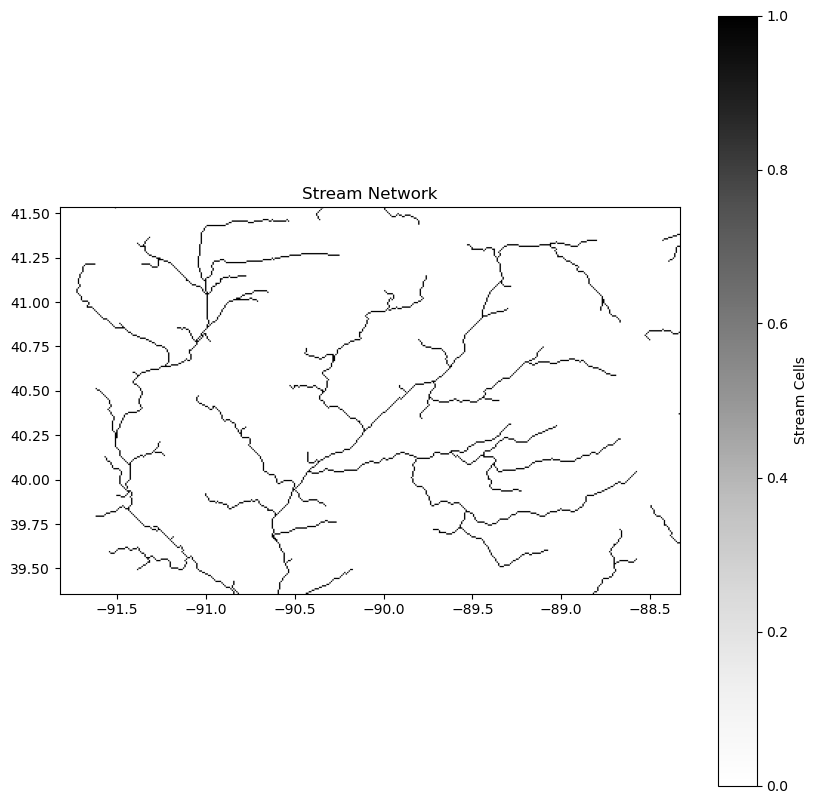

In [21]:
# Threshold to extract stream network
threshold = 500  # Adjust based on your data
streams = acc > threshold
output_path = 'stream_network.tif'
grid.to_raster(streams, output_path,nodata=0)

# Plot the stream network
plt.figure(figsize=(10, 10))
plt.title('Stream Network')
plt.imshow(streams, extent=grid.extent, cmap='Greys', origin='upper')
plt.colorbar(label='Stream Cells')
plt.show()

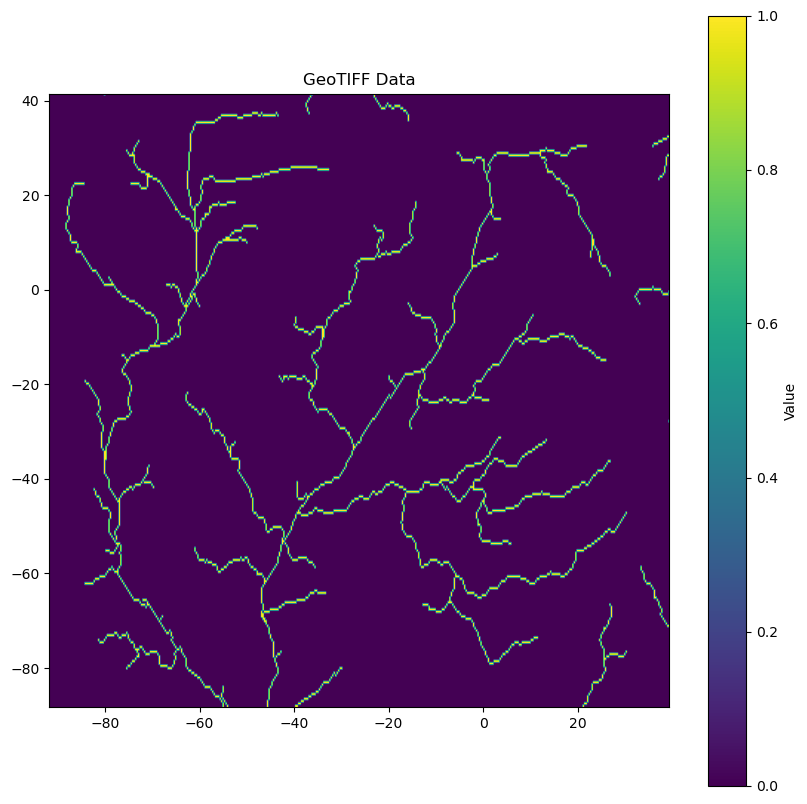

NoData value: 0.0
Coordinate Reference System: EPSG:4326


In [22]:
import rasterio
import matplotlib.pyplot as plt

# Define the path to your GeoTIFF file
geotiff_path = 'stream_network.tif'

# Open the GeoTIFF file using rasterio
with rasterio.open(geotiff_path) as src:
    # Read the data from the first band
    data = src.read(1)  # Read the first band (change band index if needed)
    
    # Get metadata of the raster, such as NoData value and spatial info
    nodata_value = src.nodata
    transform = src.transform
    crs = src.crs
    extent = src.bounds

# Plot the data using matplotlib
plt.figure(figsize=(10, 10))
plt.title('GeoTIFF Data')
plt.imshow(data, cmap='viridis', extent=extent, origin='upper')

# If you want to add a colorbar
plt.colorbar(label='Value')

# Show the plot
plt.show()

# Print NoData value and CRS information
print(f"NoData value: {nodata_value}")
print(f"Coordinate Reference System: {crs}")


In [25]:
# Import modules
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pysheds.grid import Grid
import glob


import os

geo_files = glob.glob("/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/*.tif")


output_stream_dir = '/home/lazin1/ISIMIP_WaterGap/Stream_Mississippi_20190617_5E5F_non_flood' #Harvey_D374'
os.makedirs(output_stream_dir,exist_ok=True)

for geo_file in geo_files:
    
    print(geo_file)
    # Read raw DEM
    grid = Grid.from_raster(geo_file)
    dem = grid.read_raster(geo_file)
    # Detect pits
    pits = grid.detect_pits(dem)

    # Fill pits
    pit_filled_dem = grid.fill_pits(dem)
    # pits = grid.detect_pits(pit_filled_dem)
    # assert not pits.any()

    # Detect depressions
    depressions = grid.detect_depressions(pit_filled_dem)

    # Fill depressions
    flooded_dem = grid.fill_depressions(pit_filled_dem)
    # depressions = grid.detect_depressions(flooded_dem)
    # assert not depressions.any()

    # Detect flats
    flats = grid.detect_flats(flooded_dem)

    inflated_dem = grid.resolve_flats(flooded_dem)
    # flats = grid.detect_flats(inflated_dem)
    # assert not flats.any()


    # Compute flow direction based on corrected DEM
    fdir = grid.flowdir(inflated_dem)

    # Compute flow accumulation based on computed flow direction
    acc = grid.accumulation(fdir)

    # Threshold to extract stream network
    threshold = 500  # Adjust based on your data
    streams = acc > threshold
    output_path = os.path.join(output_stream_dir, 'Stream_' + geo_file.split("/")[-1])
    grid.to_raster(streams, output_path,nodata=0)
    


/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM3_S1A_IW_GRDH_1SDV_20190217T000232_20190217T000257_025962_02E467_799D_crop_119.tif
/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM3_S1A_IW_GRDH_1SDV_20190217T000232_20190217T000257_025962_02E467_799D_crop_1514.tif
/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM2_S1A_IW_GRDH_1SDV_20190205T000232_20190205T000257_025787_02DE35_72D4_crop_1151.tif
/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM2_S1A_IW_GRDH_1SDV_20190205T000232_20190205T000257_025787_02DE35_72D4_crop_337.tif
/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM2_S1A_IW_GRDH_1SDV_20190205T000232_20190205T000257_025787_02DE35_72D4_crop_490.tif
/home/lazin1/ISIMIP_WaterGap/Mississippi_20190617_5E5F_cropped_dems_non_flood/non_flood_WM4_S1A_IW_GRDH_1SDV_20190325T000232_20190325